<h1 style="text-align:center; color:#daa520">Exploratory Data Analysis</h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Create data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

### 1. Load the datasets

In [5]:
try:
    customers_df = pd.read_csv('data/Customers.csv')
    products_df = pd.read_csv('data/Products.csv')
    transactions_df = pd.read_csv('data/Transactions.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: Ensure that the CSV files are in the 'data' folder.")
    exit()

Data loaded successfully!


### 2.  Data Exploration

In [6]:
# Display basic info and first few rows of each dataframe
print("Customers DataFrame Info:")
customers_df.info()
print("\nCustomers DataFrame Head:")
print(customers_df.head())

print("\nProducts DataFrame Info:")
products_df.info()
print("\nProducts DataFrame Head:")
print(products_df.head())

print("\nTransactions DataFrame Info:")
transactions_df.info()
print("\nTransactions DataFrame Head:")
print(transactions_df.head())

Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Customers DataFrame Head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --

### 3. Data Cleaning and Preprocessing

#### 3.1 Convert date columns to datetime objects

In [7]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

#### 3.2 Check for missing values

In [8]:
print("\nMissing values in Customers DataFrame:")
print(customers_df.isnull().sum())
print("\nMissing values in Products DataFrame:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions DataFrame:")
print(transactions_df.isnull().sum())


Missing values in Customers DataFrame:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


#### 3.3 Descriptive statistics

In [9]:
print("\nDescriptive statistics for Customers DataFrame:")
print(customers_df.describe(include='all'))
print("\nDescriptive statistics for Products DataFrame:")
print(products_df.describe(include='all'))
print("\nDescriptive statistics for Transactions DataFrame:")
print(transactions_df.describe(include='all'))


Descriptive statistics for Customers DataFrame:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Descriptive statistics for Products DataFrame:
       ProductID            ProductName Category       Price
count        100                    100      100  

### 4. Data Visualization

### 4.1 Customer Distribution by Region

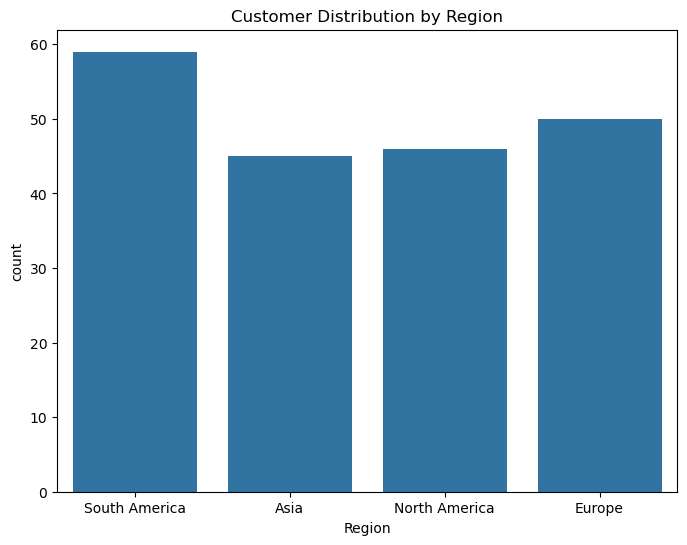

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

#### South America is a Key Market:
<p>South America has the highest number of customers, indicating a strong market presence. This region should be prioritized for marketing and sales efforts</p>

### 4.2 Product Category Distribution

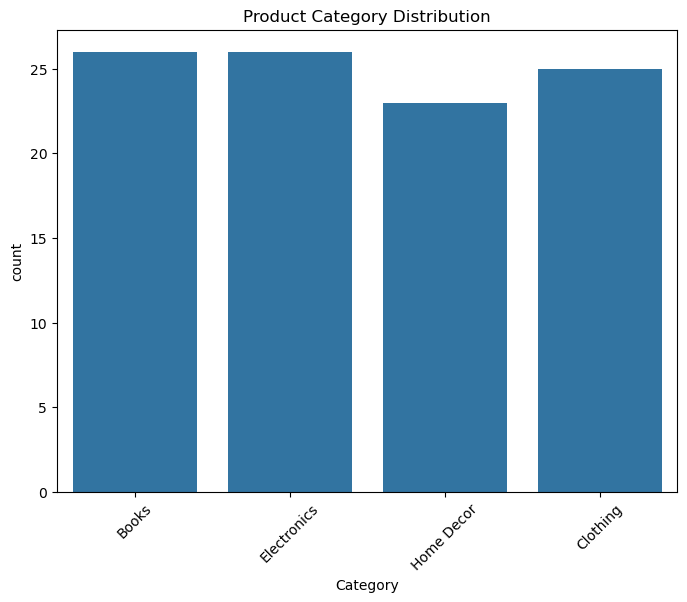

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=products_df, x='Category')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

##### Books and Electronics are Popular:
<p>The "Books" and "Electronics" categories have the most products and are likely driving a significant portion of sales. These categories should be further analyzed to understand customer preferences and optimize product offerings.</p>

### 4.3 Transaction Quantity Distribution

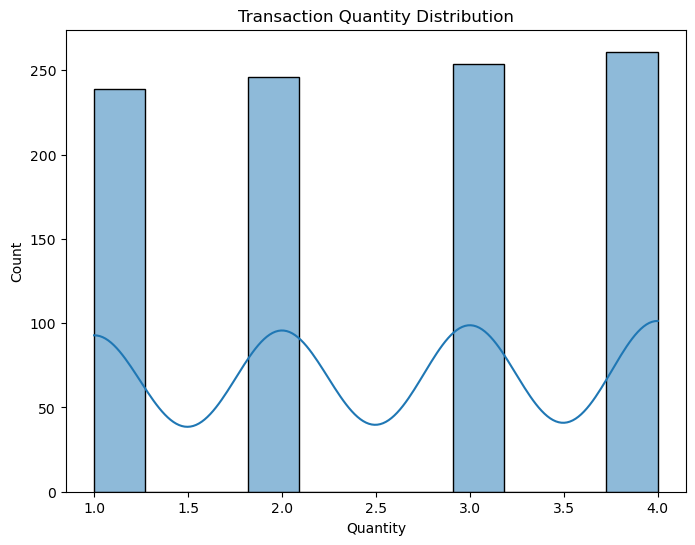

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=transactions_df, x='Quantity', kde=True)
plt.title('Transaction Quantity Distribution')
plt.show()

#### Small Order Sizes are Common: 
<p>Most transactions involve small quantities (1-4 items), suggesting that customers often make smaller, frequent purchases. This should be considered when planning inventory and logistics.</p>

### 4.4 Transaction Value Distribution

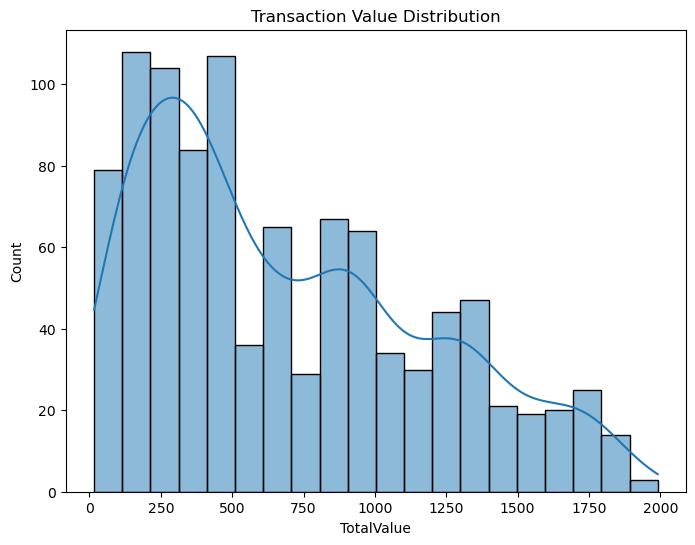

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=transactions_df, x='TotalValue', bins=20, kde=True)
plt.title('Transaction Value Distribution')
plt.show()

#### High-Value Transactions Drive Revenue: 
<p>The skewed distribution of transaction values indicates that a small number of high-value transactions contribute significantly to the overall revenue. 
Identifying and targeting these high-value customers could be beneficial.</p>

### 4.5 Signup Date Distribution

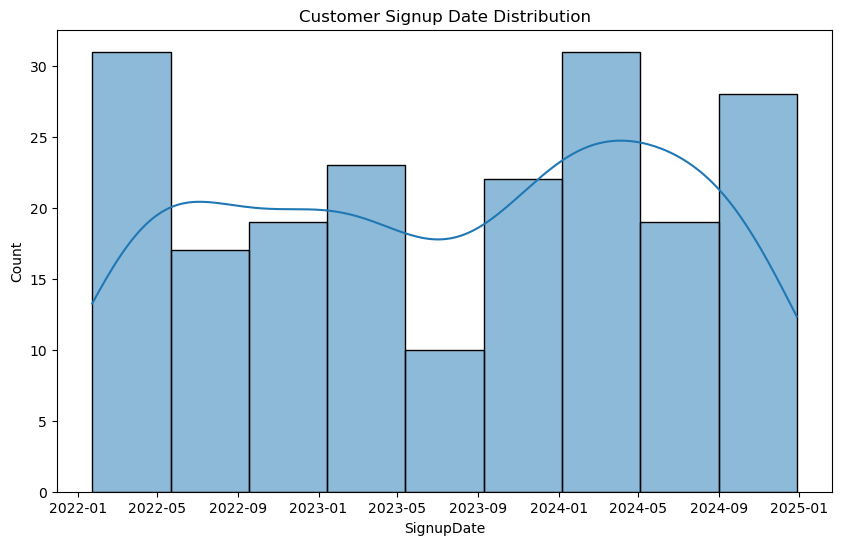

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customers_df, x='SignupDate', kde=True)
plt.title('Customer Signup Date Distribution')
plt.show()

#### Customer Base is Growing: 
<p>The increasing trend of customer signups over time, along with the transaction data, indicates a growing customer base and business expansion. This growth should be monitored and supported with appropriate resources.</p>